<a href="https://colab.research.google.com/github/RakshithSuresh/amazon_Stock_analysis/blob/main/AMAZON_TIMESERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AMZN', start = '2025-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2025-01-02,220.220001,225.149994,218.190002,222.029999,33956600
2025-01-03,224.190002,225.360001,221.619995,222.509995,27515600
2025-01-06,227.610001,228.839996,224.839996,226.779999,31849800
2025-01-07,222.110001,228.380005,221.460007,227.899994,28084200
2025-01-08,222.130005,223.520004,220.199997,223.190002,25033300
2025-01-10,218.940002,221.710007,216.500000,221.460007,36811500
2025-01-13,218.460007,219.399994,216.470001,218.059998,27262700
2025-01-14,217.759995,221.820007,216.199997,220.440002,24711700


# **Line Chart**

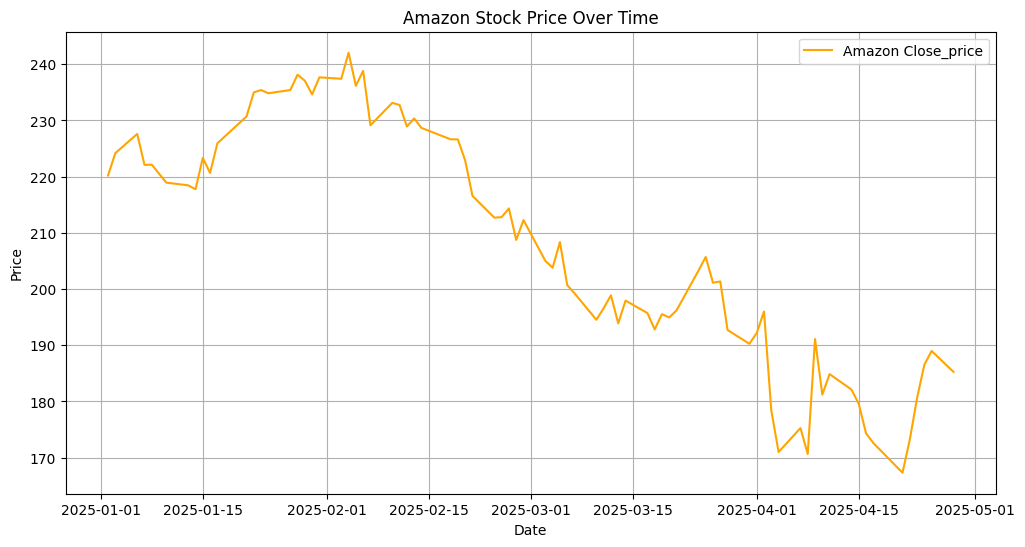

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='Amazon Close_price', color='Orange')
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#**Decomposition**

<Figure size 1400x1000 with 0 Axes>

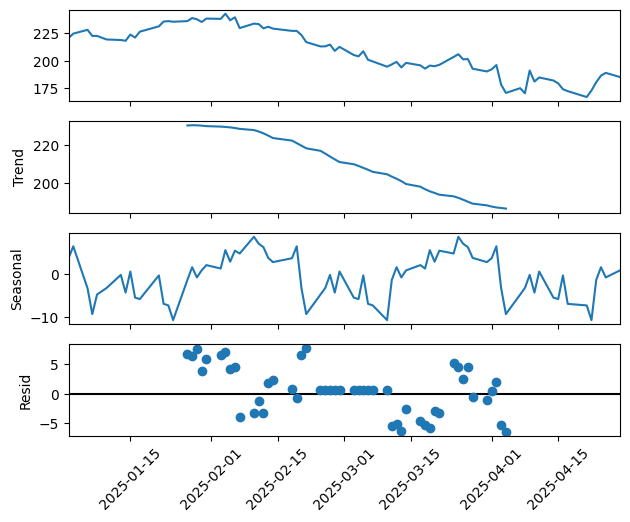

In [ ]:
# classical time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(stock_data['Close'], model='additive', period= 30)
plt.figure(figsize=(14,10))
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

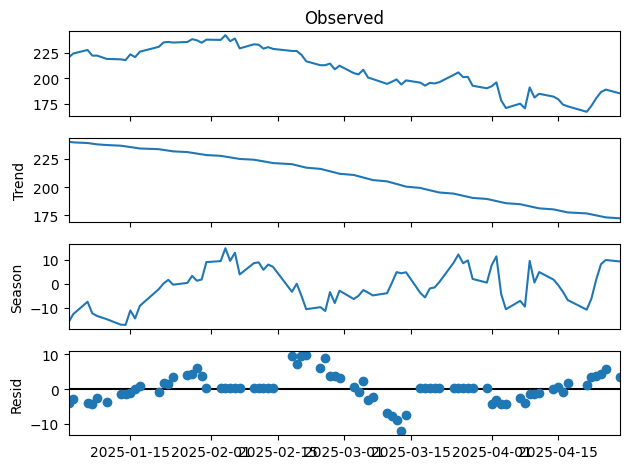

In [ ]:
# STL decomposition
from statsmodels.tsa.seasonal import STL
stl = STL(stock_data['Close'], period=30)
res = stl.fit()
fig = res.plot()
plt.show()

#**Stationarity Test**

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller

#perform ADF test
print('Results of Dickey-Fuller Test:')
adf_test = adfuller(stock_data['Close'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

print('Critical Values: ')
for key, value in adf_test[4].items():
  print('\t%s: %.3f' % (key, value))

Results of Dickey-Fuller Test:
ADF Statistic: -0.709682
p-value: 0.844226
Critical Values: 
	1%: -3.518
	5%: -2.900
	10%: -2.587


from the results of ADF test it is clear that **p-value > 0.05** and **ADF Static < critical value**, which implies it is **NON-STATIONARY** data

In [ ]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
print('Results of KPSS Test:')
kpss_test = kpss(stock_data['Close'])
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])

print('Critical Values: ')
for key, value in kpss_test[3].items():
  print('\t%s: %.3f' % (key, value))

Results of KPSS Test:
KPSS Statistic: 1.216039
p-value: 0.010000
Critical Values: 
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


from the results of KPSS test it is clear that **p-value < 0.05** and **KPSS Static < critical value**, which implies it is **NON-STATIONARY** data

In [ ]:
# Performing KS test
from scipy.stats import kstest, norm
import numpy as np

# Extract and flatten 'Close' prices
close_prices = stock_data['Close'].values.flatten()

# Fit normal distribution parameters
mean, std = np.mean(close_prices), np.std(close_prices)

# Perform KS test
ks_statistic, p_value = kstest(close_prices, 'norm', args=(mean, std))

# Print results (ensure ks_statistic/p_value are scalars)
print(f"KS Statistic: {float(ks_statistic):.4f}")  # Explicitly convert to float
print(f"P-value: {float(p_value):.4f}")

# Interpret results
if p_value > 0.05:
    print("Fail to reject H0: Data follows normal distribution.")
else:
    print("Reject H0: Data does NOT follow normal distribution.")


KS Statistic: 0.1000
P-value: 0.3830
Fail to reject H0: Data follows normal distribution.


# Performing KS test on Random Data (only for learning)

Strict Stationary Series - K-S Test Statistic: 0.068, p-value: 0.6109
Weak Stationary Series - K-S Test Statistic: 0.184, p-value: 0.0004


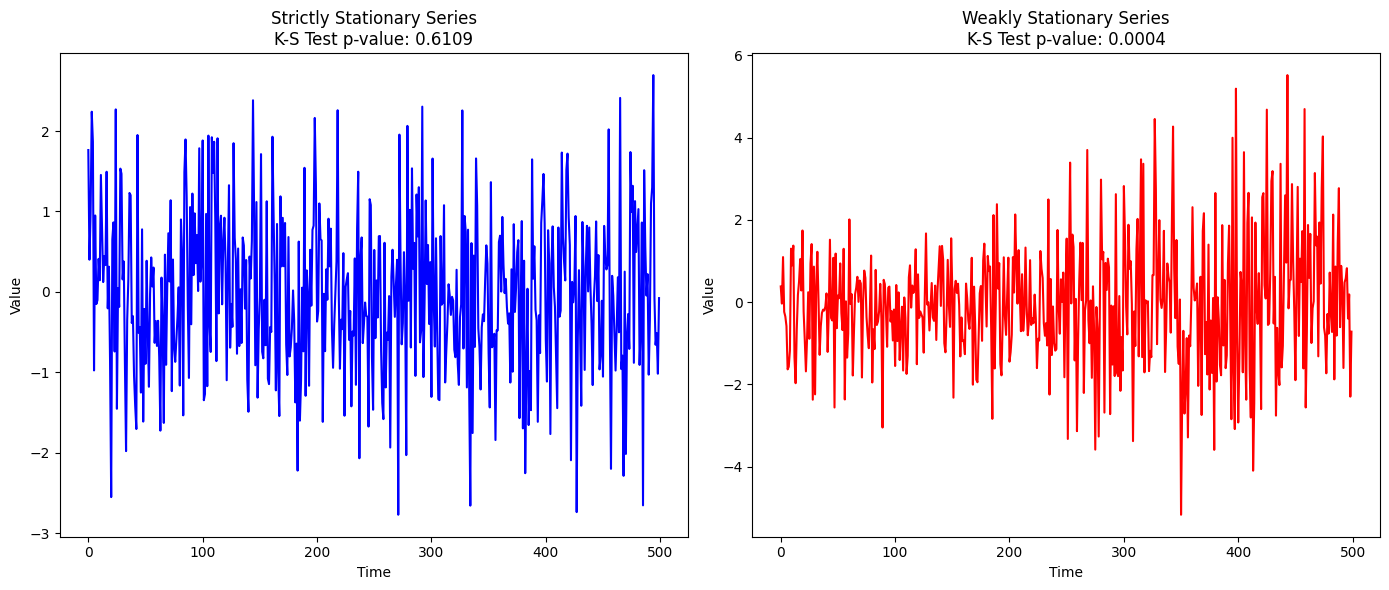

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

# Perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

# Print the K-S test results for both series
print("Strict Stationary Series - K-S Test Statistic: %.3f, p-value: %.4f" % (ks_stat_strict, ks_pvalue_strict))
print("Weak Stationary Series - K-S Test Statistic: %.3f, p-value: %.4f" % (ks_stat_non_strict, ks_pvalue_non_strict))

# Plotting both series side by side
plt.figure(figsize=(14, 6))

# Plot strictly stationary series
plt.subplot(1, 2, 1)
plt.plot(strict_stationary_series, color='blue')
plt.title('Strictly Stationary Series\nK-S Test p-value: %.4f' % ks_pvalue_strict)
plt.xlabel('Time')
plt.ylabel('Value')

# Plot non-strictly stationary series
plt.subplot(1, 2, 2)
plt.plot(non_strict_stationary_series, color='red')
plt.title('Weakly Stationary Series\nK-S Test p-value: %.4f' % ks_pvalue_non_strict)
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Making data stationary

In [ ]:
# creating 2 functions to test ADF and KPSS test for time series
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    print ('Test statistic: ' + str(dftest[0]))
    print ('p-value: ' + str(dftest[1]))
    for key, value in dftest[4].items():
        print('\t' + 'Critical Value (%s): '%key + str(value))


def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries)
    print ('Test statistic: ' + str(kpsstest[0]))
    print ('p-value: ' + str(kpsstest[1]))
    for key, value in kpsstest[3].items():
        print('\t' + 'Critical Value (%s): '%key + str(value))

In [ ]:
prices = stock_data['Close']

In [ ]:
adf_test(prices)

Results of Dickey-Fuller Test:
Test statistic: -0.7096818067302603
p-value: 0.8442257676017516
	Critical Value (1%): -3.518281134660583
	Critical Value (5%): -2.899878185191432
	Critical Value (10%): -2.5872229937594873


In [ ]:
kpss_test(prices)

Results of KPSS Test:
Test statistic: 1.2160388540287723
p-value: 0.01
	Critical Value (10%): 0.347
	Critical Value (5%): 0.463
	Critical Value (2.5%): 0.574
	Critical Value (1%): 0.739


# Making the data Stationary

In [ ]:
prices

Ticker,AMZN
Date,
2025-01-02,220.220001
2025-01-03,224.190002
2025-01-06,227.610001
2025-01-07,222.110001
2025-01-08,222.130005
...,...
2025-04-22,173.179993
2025-04-23,180.600006
2025-04-24,186.539993


**1. Differencing**

In [ ]:
# First Order Differencing
prices_diff = prices.diff()
prices_diff.dropna(inplace=True) #dropping NaN values
prices_diff

Ticker,AMZN
Date,
2025-01-03,3.970001
2025-01-06,3.419998
2025-01-07,-5.500000
2025-01-08,0.020004
2025-01-10,-3.190002
...,...
2025-04-22,5.859985
2025-04-23,7.420013
2025-04-24,5.939987


In [ ]:
# Second order Differencing
prices_diff2 = prices.diff().diff()
prices_diff2.dropna(inplace=True) #dropping NaN values
prices_diff2

Ticker,AMZN
Date,
2025-01-06,-0.550003
2025-01-07,-8.919998
2025-01-08,5.520004
2025-01-10,-3.210007
2025-01-13,2.710007
...,...
2025-04-22,11.149979
2025-04-23,1.560028
2025-04-24,-1.480026


In [ ]:
print("1st Order Differencing")
adf_test(prices_diff)
print()
print("2nd Order Differencing")
adf_test(prices_diff2)

1st Order Differencing
Results of Dickey-Fuller Test:
Test statistic: -10.527167905730838
p-value: 9.352484835843893e-19
	Critical Value (1%): -3.518281134660583
	Critical Value (5%): -2.899878185191432
	Critical Value (10%): -2.5872229937594873

2nd Order Differencing
Results of Dickey-Fuller Test:
Test statistic: -5.83552003164181
p-value: 3.884830803227039e-07
	Critical Value (1%): -3.530398990560757
	Critical Value (5%): -2.9050874099328317
	Critical Value (10%): -2.5900010121107266


**2. Transformation**

In [ ]:
arr = prices.values
arr.shape

(79, 1)

In [ ]:
# Applying different types of Transformation to make the data stationary
from scipy import stats
import numpy as np

# Log transformation
prices_log = np.log(prices)

# Square root transformation
prices_sqrt = np.sqrt(prices)

# Box-Cox transformation
# Note: Box-Cox requires all positive values
prices_boxcox, lambda_value = stats.boxcox(arr[arr>0])  #storing the price values in 1d array inside arr variable

In [ ]:
prices_log

Ticker,AMZN
Date,
2025-01-02,5.394627
2025-01-03,5.412494
2025-01-06,5.427634
2025-01-07,5.403173
2025-01-08,5.403263
...,...
2025-04-22,5.154331
2025-04-23,5.196285
2025-04-24,5.228646


In [ ]:
prices_sqrt

Ticker,AMZN
Date,
2025-01-02,14.839811
2025-01-03,14.972976
2025-01-06,15.086749
2025-01-07,14.903355
2025-01-08,14.904026
...,...
2025-04-22,13.159787
2025-04-23,13.438750
2025-04-24,13.657964


In [ ]:
prices_boxcox

array([6392.90724154, 6593.0866098 , 6767.60909081, 6487.88305419,
       6488.89145232, 6328.91979401, 6304.99449374, 6270.17083304,
       6550.5151447 , 6414.96554434, 6682.1496105 , 6927.45549301,
       7151.76814979, 7173.31313194, 7143.3684279 , 7173.31313194,
       7317.46360456, 7260.29352509, 7132.3489413 , 7292.56048956,
       7278.7999615 , 7526.01737974, 7212.79481421, 7353.55712664,
       6846.82005737, 7053.84895998, 7034.02005613, 6835.48037193,
       6909.84682587, 6822.604031  , 6718.42648717, 6717.40402281,
       6526.74583524, 6211.65314676, 6021.35602858, 6025.75307509,
       6101.69483845, 5828.7345529 , 6000.3653066 , 5650.63828051,
       5592.73696402, 5810.43521475, 5446.74037551, 5379.009994  ,
       5161.46689857, 5255.68716409, 5362.24935216, 5131.74224454,
       5318.58914389, 5216.53375029, 5082.96809808, 5207.33841576,
       5180.25374917, 5238.16836128, 5567.18822445, 5683.49676781,
       5466.89481507, 5477.687541  , 5078.41946426, 4967.06927

In [ ]:
print("Log ADF Results")
adf_test(prices_log)
print()
print("Sqrt ADF Results")
adf_test(prices_sqrt)
print()
print("Boxcox ADF Results")
adf_test(prices_boxcox)
print()



Log ADF Results
Results of Dickey-Fuller Test:
Test statistic: -0.7864753068153483
p-value: 0.8230625982048858
	Critical Value (1%): -3.518281134660583
	Critical Value (5%): -2.899878185191432
	Critical Value (10%): -2.5872229937594873

Sqrt ADF Results
Results of Dickey-Fuller Test:
Test statistic: -0.7465577221643377
p-value: 0.8343187813316348
	Critical Value (1%): -3.518281134660583
	Critical Value (5%): -2.899878185191432
	Critical Value (10%): -2.5872229937594873

Boxcox ADF Results
Results of Dickey-Fuller Test:
Test statistic: -0.6619814236632159
p-value: 0.8563530214943205
	Critical Value (1%): -3.518281134660583
	Critical Value (5%): -2.899878185191432
	Critical Value (10%): -2.5872229937594873



**3. Detrending**

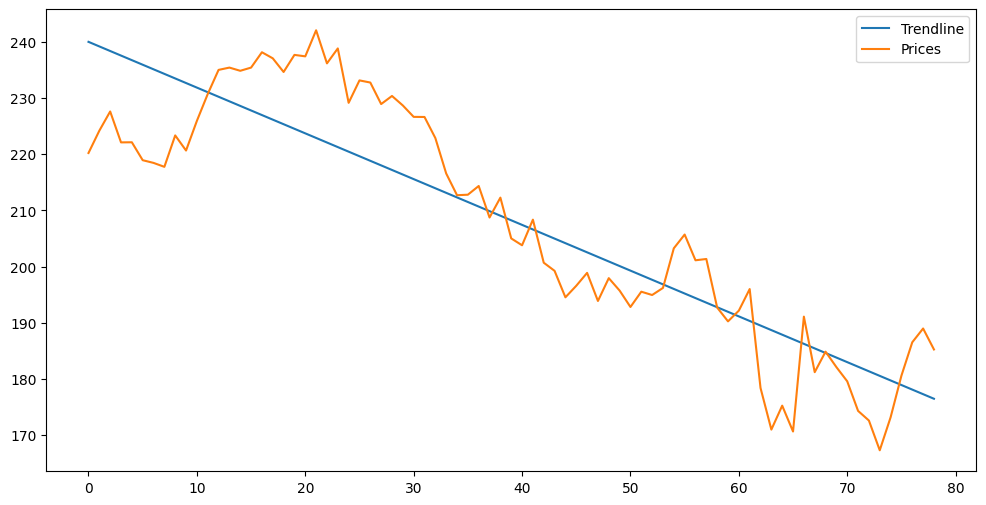

In [ ]:
# using a linear trend
arr = arr.flatten()
# Importing signal processing tools
from scipy import signal

# polyfit Fits a polynomial of given degree to (x, y) points.
trend = np.polyfit(np.arange(len(arr)), arr, 1)
# Here degree=1, so it’s fitting a straight line (linear trend).

trendline = np.polyval(trend, np.arange(len(arr)))
# polyval gives the predicted trend line values at each time step.

prices_detrended = arr - trendline

#plotting trendline vs prices
plt.figure(figsize=(12,6))
plt.plot(trendline, label='Trendline')
plt.plot(arr, label='Prices')
plt.legend()
plt.show()

In [ ]:
print(type(prices_detrended))
print(prices_detrended.shape)
print(arr.shape)

<class 'numpy.ndarray'>
(79,)
(79,)


In [ ]:
adf_test(prices_detrended)

Results of Dickey-Fuller Test:
Test statistic: -2.7679399167697207
p-value: 0.06300126149491364
	Critical Value (1%): -3.517113604831504
	Critical Value (5%): -2.8993754262546574
	Critical Value (10%): -2.5869547797501644


In [ ]:
# using a moving average detrending
window = 12
prices_ma = prices.rolling(window=window).mean()
prices_detrended_ma = prices - prices_ma
prices_detrended_ma.dropna(inplace=True)
prices_detrended_ma

Ticker,AMZN
Date,
2025-01-21,8.036671
2025-01-22,11.104159
2025-01-23,10.578330
2025-01-24,9.405004
2025-01-27,8.865829
...,...
2025-04-22,-3.758340
2025-04-23,2.861673
2025-04-24,7.861660


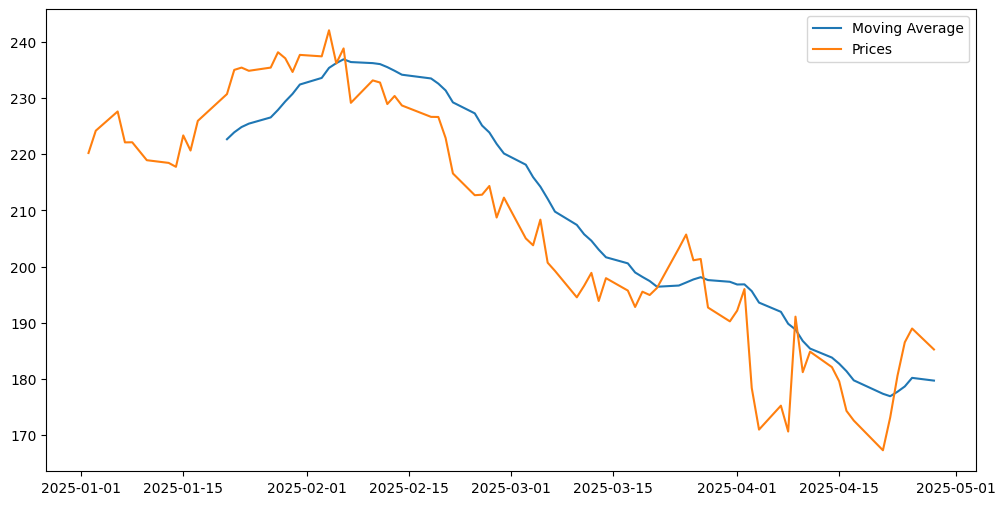

In [ ]:
# plotting moving avg vs prices
plt.figure(figsize=(12,6))
plt.plot(prices_ma, label='Moving Average')
plt.plot(prices, label='Prices')
plt.legend()
plt.show()

**4. Seasonal Adjustments**

In [ ]:
prices #just revisiting the dataframe

Ticker,AMZN
Date,
2025-01-02,220.220001
2025-01-03,224.190002
2025-01-06,227.610001
2025-01-07,222.110001
2025-01-08,222.130005
...,...
2025-04-22,173.179993
2025-04-23,180.600006
2025-04-24,186.539993


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal decomposition using MAs
decomposition = seasonal_decompose(prices['AMZN'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

prices_adjusted = prices['AMZN'] - seasonal
prices_adjusted.dropna(inplace=True)
prices_adjusted.head()

,0
Date,
2025-01-02,216.507572
2025-01-03,217.680653
2025-01-06,230.944896
2025-01-07,231.487733
2025-01-08,226.924898


In [ ]:
adf_test(prices_adjusted)

Results of Dickey-Fuller Test:
Test statistic: -0.48534925655343536
p-value: 0.894843921004969
	Critical Value (1%): -3.518281134660583
	Critical Value (5%): -2.899878185191432
	Critical Value (10%): -2.5872229937594873


# Choosing best method:

After implementing all the methods, only 1st order and 2nd order differencing was able to make the data stationary as per ADF test. So choosing, 1st order differencing as it has lowest tstat value.

# Identifying White Noise and Random Walk

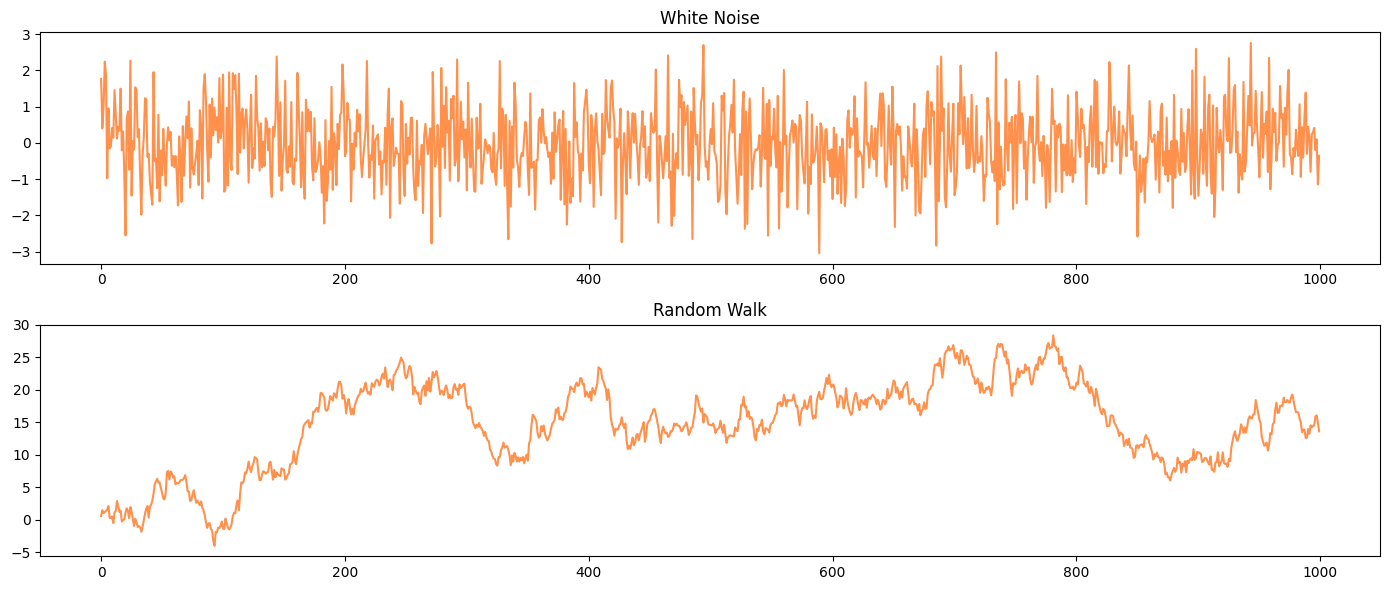


Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0, 1, n)

# Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise, color='#FF914D')
plt.title('White Noise')

plt.subplot(2, 1, 2)
plt.plot(random_walk, color='#FF914D')
plt.title('Random Walk')

plt.tight_layout()
plt.show()

# Ljung-Box test
print("\nLjung-Box Test for White Noise:")
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)

print("\nLjung-Box Test for Random Walk:")
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)

# Building Models

**AR Model**

In [ ]:
# splitting training and testing data using 1st order differenced data
train, test = prices_diff[:-30], prices_diff[-30:]

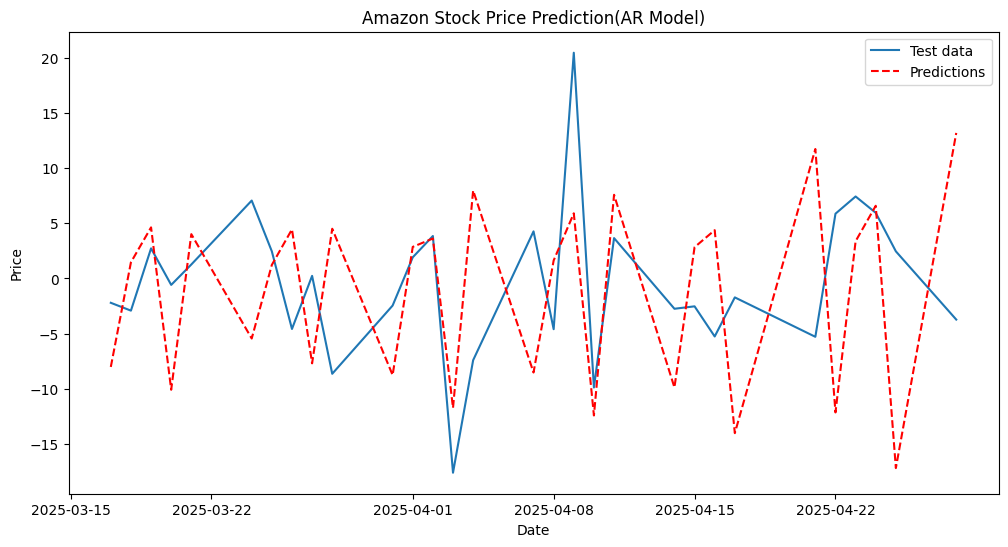

RMSE: 10.0


In [ ]:
# Auto Regressive Model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

ar_model = AutoReg(train, lags=14)
ar_model_fit = ar_model.fit()

# make predictions on test data
predictions = ar_model_fit.predict(
    start=len(train),
    end=len(train)+len(test)-1,
    dynamic=False)

# plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, predictions, color='red', label='Predictions', linestyle='--')
plt.title('Amazon Stock Price Prediction(AR Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test, predictions)), 2)
print(f"RMSE: {rmse}")

**MA Model**

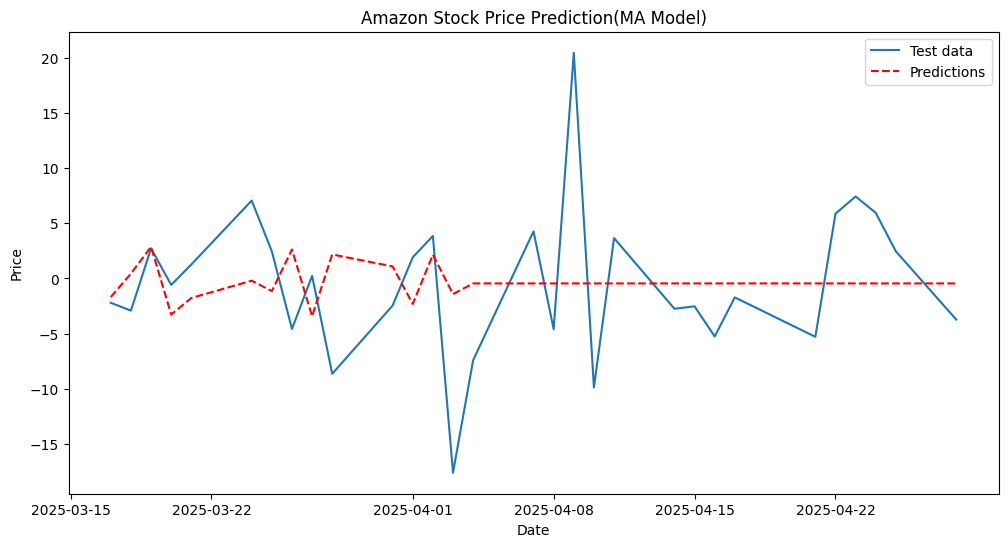

RMSE: 6.88


In [ ]:
# using ARIMA model and keep p,d = 0 to get MA model
from statsmodels.tsa.arima.model import ARIMA

ma_model = ARIMA(train, order=(0, 0, 14))
ma_model_fit = ma_model.fit()

# make predictions on test data
predictions = ma_model_fit.predict(
    start=len(train),
    end=len(train)+len(test)-1,
    dynamic=False)

# plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, predictions, color='red', label='Predictions', linestyle='--')
plt.title('Amazon Stock Price Prediction(MA Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test, predictions)), 2)
print(f"RMSE: {rmse}")

**ARMA Model**

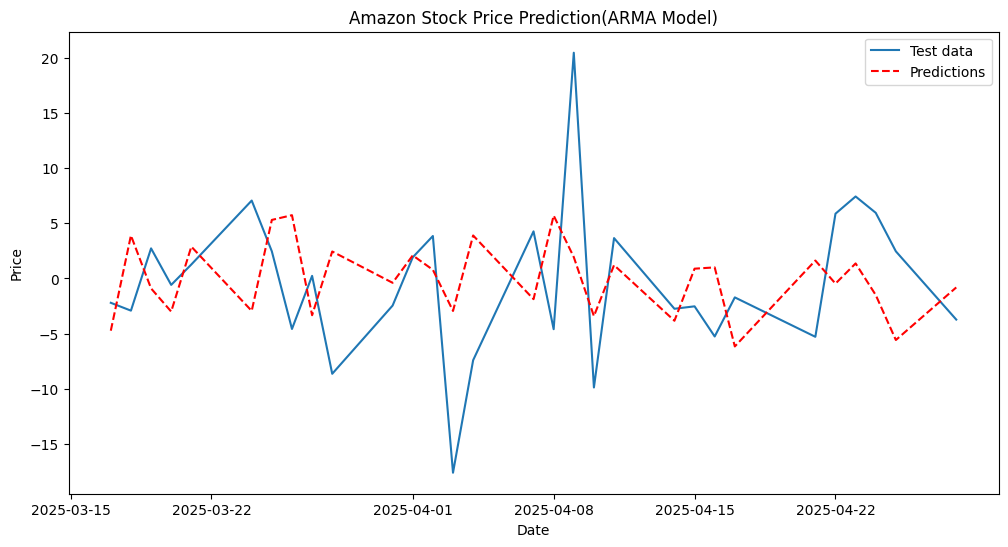

RMSE: 7.39


In [ ]:
# using ARIMA model and keep d = 0 to get ARMA model
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(train, order=(14, 0, 14))
arma_model_fit = arma_model.fit()

# make predictions on test data
predictions = arma_model_fit.predict(
    start=len(train),
    end=len(train)+len(test)-1,
    dynamic=False)

# plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, predictions, color='red', label='Predictions', linestyle='--')
plt.title('Amazon Stock Price Prediction(ARMA Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test, predictions)), 2)
print(f"RMSE: {rmse}")

**ARIMA Model**

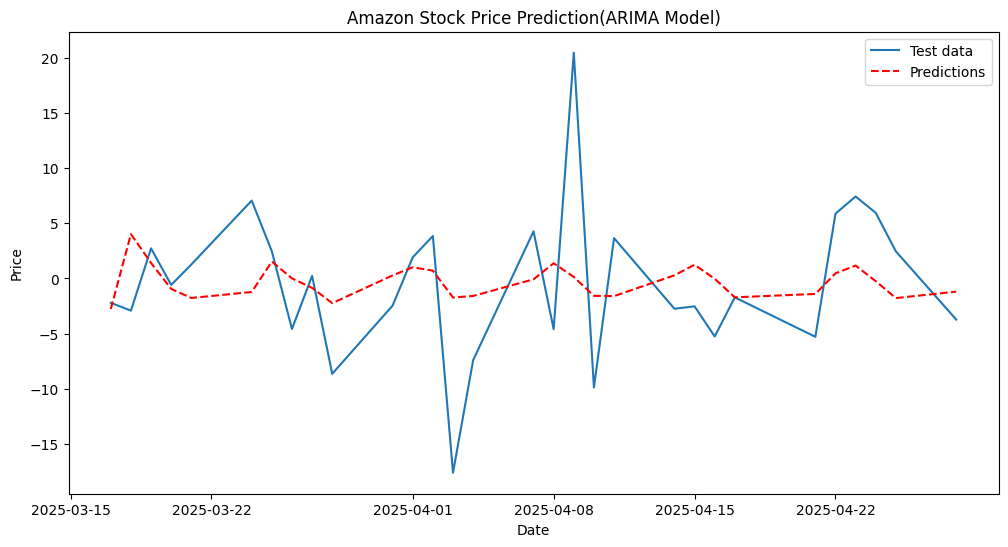

RMSE: 6.47


In [ ]:
# using ARIMA model and keep d = 1 to get ARIMA model
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(7, 1, 7))
arima_model_fit = arima_model.fit()

# make predictions on test data
predictions = arima_model_fit.predict(
    start=len(train),
    end=len(train)+len(test)-1,
    dynamic=False)

# plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, predictions, color='red', label='Predictions', linestyle='--')
plt.title('Amazon Stock Price Prediction(ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test, predictions)), 2)
print(f"RMSE: {rmse}")

**SARIMA Model**

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# p, d, q = 7, 1, 7
# P, D, Q, s = 7, 1, 7, 60

# # SARIMA model
# sarima_model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,s))
# sarima_model_fit = sarima_model.fit()

# # make predictions on test data
# predictions = sarima_model_fit.predict(
#     start=len(train),
#     end=len(train)+len(test)-1,
#     dynamic=False)

# # plot the actual vs predicted values
# plt.figure(figsize=(12,6))
# plt.plot(test.index, test, label='Test data')
# plt.plot(test.index, predictions, color='red', label='Predictions', linestyle='--')
# plt.title('Amazon Stock Price Prediction(ARIMA Model)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# # evaluating model using RMSE score
# rmse = round(np.sqrt(mean_squared_error(test, predictions)), 2)
# print(f"RMSE: {rmse}")

# Moving Average

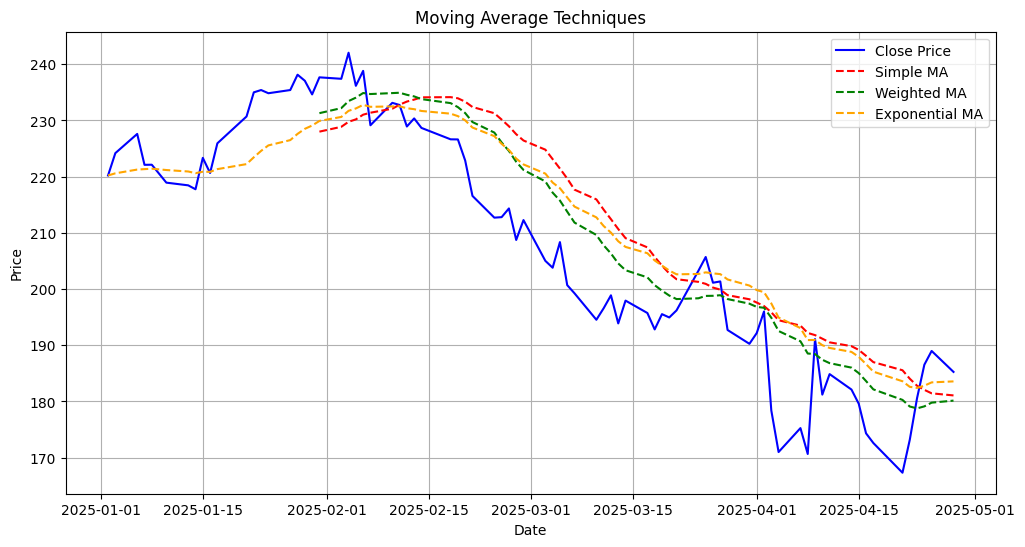

In [ ]:
window_size = 20

# Calculate Simple MA
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

# Calculate weighted MA
weights = np.arange(1, window_size+1)
stock_data['WMA'] = stock_data['Close'].rolling(window=window_size).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

# Calcute Exponential MA
stock_data['EMA'] = stock_data['Close'].ewm(span=window_size, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SMA'], label='Simple MA', color='red', linestyle='--')
plt.plot(stock_data['WMA'], label='Weighted MA', color='green', linestyle='--')
plt.plot(stock_data['EMA'], label='Exponential MA', color='orange', linestyle='--')

plt.title('Moving Average Techniques')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Exponential Smoothing

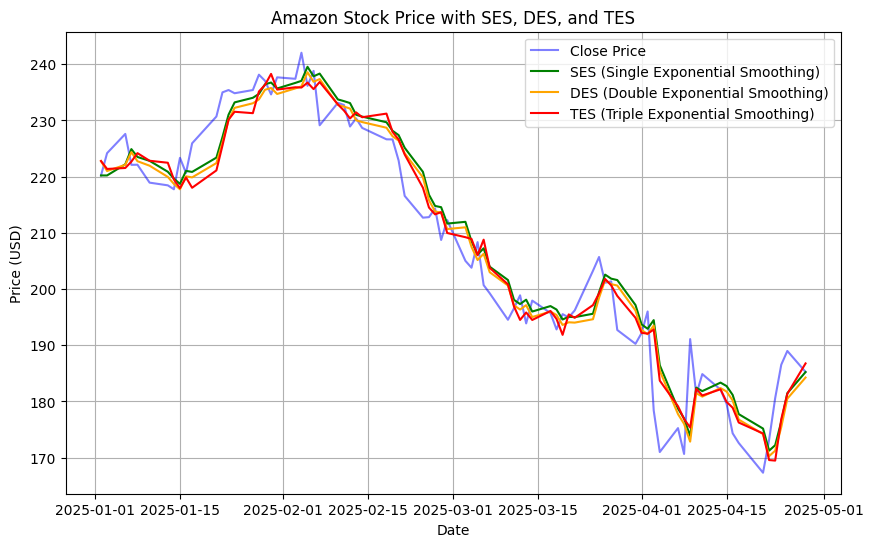

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_prices = stock_data['Close']

# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.5)
stock_data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) — Holt's Linear Trend Model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.5)
stock_data['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) — Holt-Winters Method
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.5)
stock_data['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SES'], label='SES (Single Exponential Smoothing)', color='green')
plt.plot(stock_data['DES'], label='DES (Double Exponential Smoothing)', color='orange')
plt.plot(stock_data['TES'], label='TES (Triple Exponential Smoothing)', color='red')

plt.title('Amazon Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# ACF and PACF

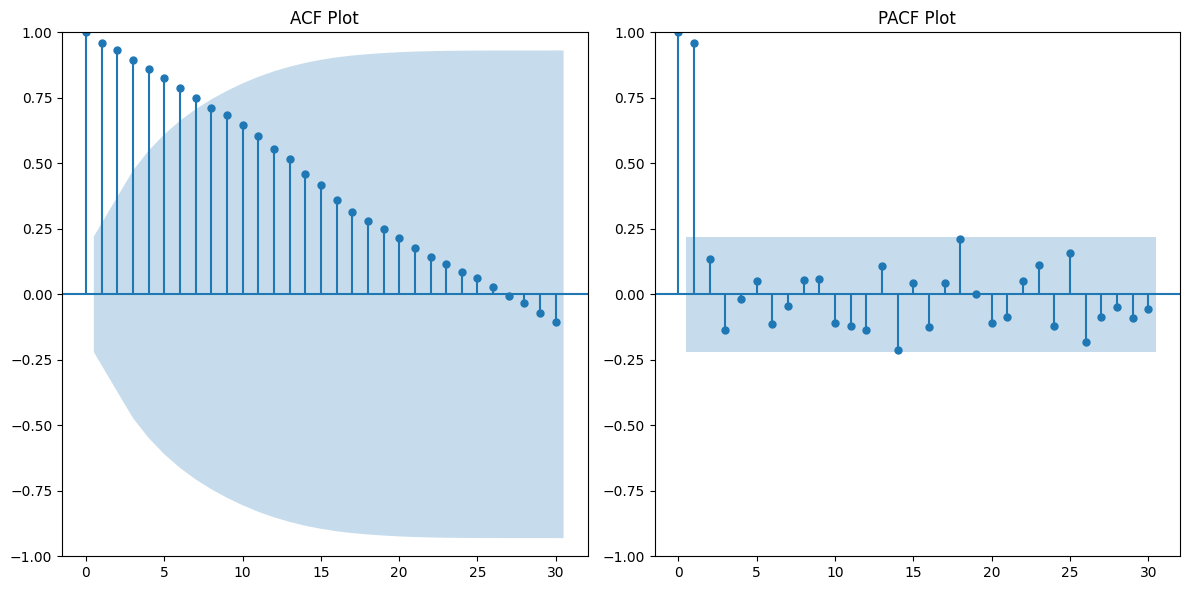

In [ ]:
# acf and pacf for non-stationary data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

# acf plot
plt.subplot(1,2,1)
plot_acf(stock_data['Close'], lags=30,ax=plt.gca())
plt.title('ACF Plot')

# pacf plot
plt.subplot(1,2,2)
plot_pacf(stock_data['Close'], lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

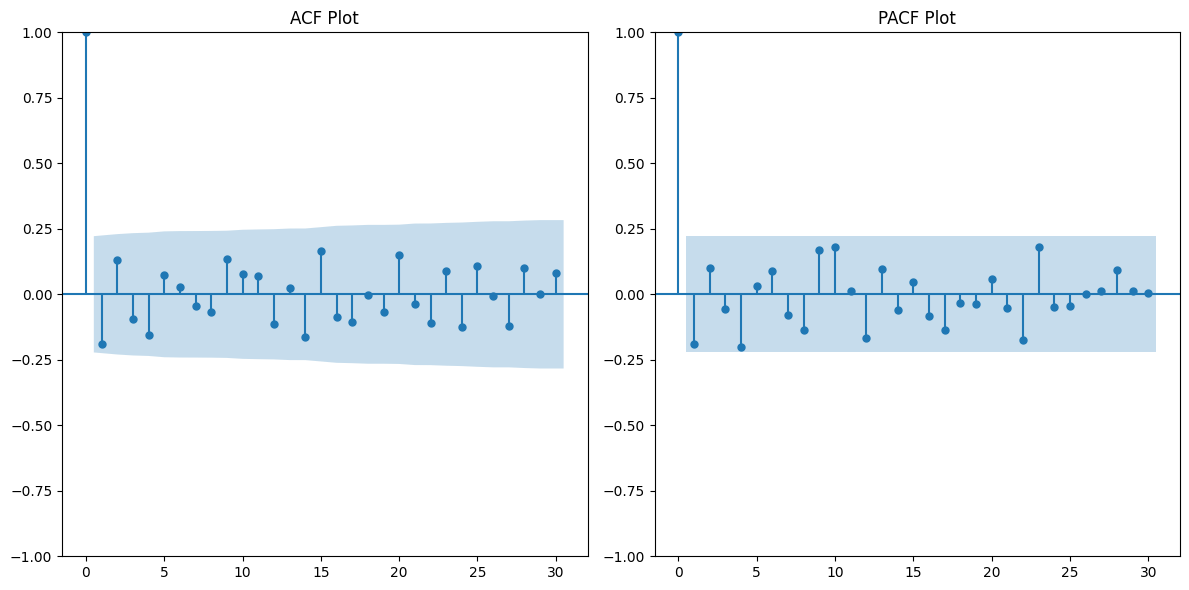

In [ ]:
# acf and pacf for difference data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

# acf plot
plt.subplot(1,2,1)
plot_acf(prices_diff, lags=30,ax=plt.gca())
plt.title('ACF Plot')

# pacf plot
plt.subplot(1,2,2)
plot_pacf(prices_diff, lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

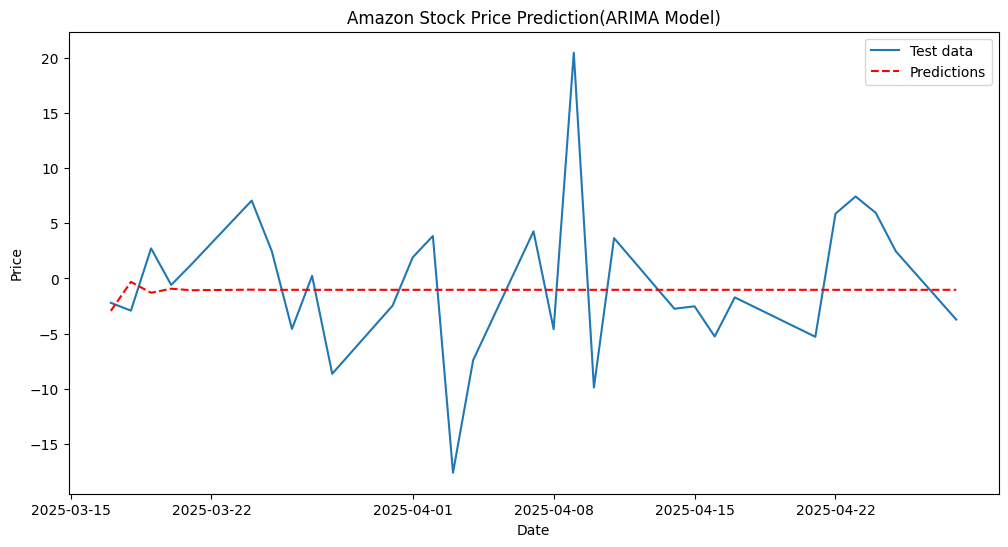

RMSE: 6.73


In [ ]:
# using ARIMA model with p=q=d= 1
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# make predictions on test data
predictions = arima_model_fit.predict(
    start=len(train),
    end=len(train)+len(test)-1,
    dynamic=False)

# plot the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test data')
plt.plot(test.index, predictions, color='red', label='Predictions', linestyle='--')
plt.title('Amazon Stock Price Prediction(ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test, predictions)), 2)
print(f"RMSE: {rmse}")

# Model Evaluation Metrics

In [ ]:
train_data = prices_diff[:-30]
test_data = prices_diff[-30:]

# evaluating AR model
ar_model = AutoReg(train_data, lags=14)
ar_model_fit = ar_model.fit()

# make predictions on test data
predictions_ar = ar_model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae_ar = mean_absolute_error(test_data, predictions_ar)

# MSE
mse_ar = mean_squared_error(test_data, predictions_ar)

# RMSE
rmse_ar = np.sqrt(mse_ar)

# R-squared
r2_ar = r2_score(test_data, predictions_ar)

# AIC and BIC
aic_ar = ar_model_fit.aic
bic_ar = ar_model_fit.bic

# Printing all neatly
print(f"MAE: {mae_ar:.4f}")
print(f"MSE: {mse_ar:.4f}")
print(f"RMSE: {rmse_ar:.4f}")
print(f"R-squared: {r2_ar:.4f}")
print(f"AIC: {aic_ar:.4f}")
print(f"BIC: {bic_ar:.4f}")

MAE: 8.2503
MSE: 100.0120
RMSE: 10.0006
R-squared: -1.2339
AIC: 178.8466
BIC: 203.2684
